Task No : 3

Problem Statement : Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal
measurements.

In [1]:
#Import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Step 1 : Read the dataset
import pandas as pd
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Step 2 : Perform basic data quality check
df.info()  #Check the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum() #Check the missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum() #Check the duplicate values

3

In [6]:
#Step 3:Seperate catand con features
cat = df.columns[df.dtypes==object]
con = df.columns[df.dtypes!=object]

In [7]:
cat

Index(['species'], dtype='object')

In [8]:
con

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [9]:
#Step 4:Seperate x and y
x = df.drop(columns=['species'])
y = df[['species']]

In [10]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
y.value_counts()

species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

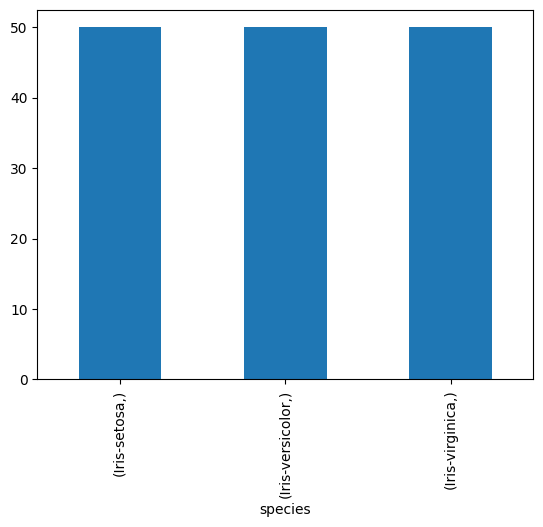

In [50]:
y.value_counts().plot(kind='bar')

In [14]:
#Step 4: Apply preprocessing on X
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
#Step 5: Apply Train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, y, test_size=0.33, random_state=21)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.106445,0.649027,0.396172
49,-1.021849,0.569251,-1.341272,-1.312977
65,1.038005,0.106445,0.364699,0.264699
118,2.249683,-1.050569,1.786341,1.447956
55,-0.173674,-0.587764,0.421564,0.133226


In [19]:
ytrain.head()

,species
52,Iris-versicolor
49,Iris-setosa
65,Iris-versicolor
118,Iris-virginica
55,Iris-versicolor


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052506,-1.050569,0.137236,0.001753
44,-0.900681,1.726266,-1.056944,-1.050031
7,-1.021849,0.800654,-1.284407,-1.312977
21,-0.900681,1.494863,-1.284407,-1.050031
95,-0.173674,-0.124958,0.250967,0.001753


In [21]:
ytest.head()

,species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


In [22]:
#Step 6: Model Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)


LogisticRegression()

In [23]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
model.intercept_

array([-0.17009434,  1.82600148, -1.65590715])

In [25]:
model.coef_

array([[-0.93555991,  1.24735493, -1.63468997, -1.61414063],
       [ 0.38437553, -0.37161075, -0.41059697, -0.59865882],
       [ 0.55118438, -0.87574418,  2.04528694,  2.21279945]])

In [26]:
#Step 7: Evaluating model
# Check accuracy in training
model.score(xtrain, ytrain)

0.98

In [27]:
# Check accuracy in testing
model.score(xtest, ytest)

0.94

In [28]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [29]:
ypred_train[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [30]:
ytrain.head()

,species
52,Iris-versicolor
49,Iris-setosa
65,Iris-versicolor
118,Iris-virginica
55,Iris-versicolor


In [31]:
ypred_test[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [32]:
ytest.head()

,species
92,Iris-versicolor
44,Iris-setosa
7,Iris-setosa
21,Iris-setosa
95,Iris-versicolor


In [33]:
#Step 8 :Plot the confusion matrix
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

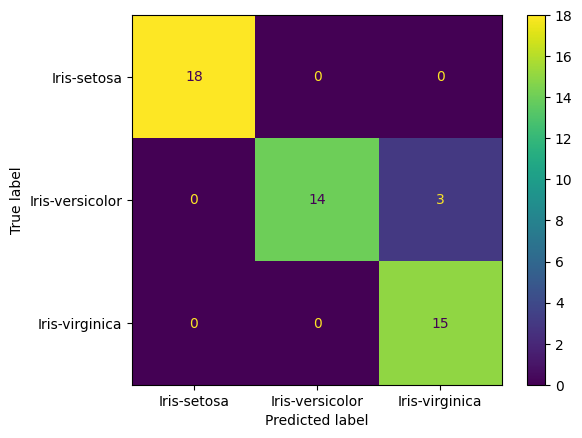

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [35]:
#Step 9:Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.82      0.90        17
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.95      0.94      0.94        50



In [36]:
ytest.value_counts()

species        
Iris-setosa        18
Iris-versicolor    17
Iris-virginica     15
Name: count, dtype: int64

F1 Macro average is more than 80% on test data hence its a good model

In [37]:
#Step 10:Get the probability for train and test
yprob_train = model.predict_proba(xtrain)
yprob_test = model.predict_proba(xtest)

In [38]:
model.classes_


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [39]:
yprob_train[0:5]

array([[5.80640398e-03, 6.45140235e-01, 3.49053361e-01],
       [9.62651740e-01, 3.73475870e-02, 6.72531913e-07],
       [1.67343173e-02, 8.34261846e-01, 1.49003837e-01],
       [9.14862561e-08, 2.78449735e-03, 9.97215411e-01],
       [2.86909795e-02, 8.34082024e-01, 1.37226997e-01]])

In [40]:
yprob_test[0:5]

array([[2.04775870e-02, 9.12992505e-01, 6.65299084e-02],
       [9.87226823e-01, 1.27726258e-02, 5.51447658e-07],
       [9.72197405e-01, 2.78020825e-02, 5.12289442e-07],
       [9.85955356e-01, 1.40442540e-02, 3.89744617e-07],
       [8.82112835e-02, 8.60816887e-01, 5.09718292e-02]])

In [41]:
#Step 11:Out of sample data prediction
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [42]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [43]:
#Step 12:Apply pre.transform on xnew
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.281972,0.137236,0.133226
1,1.280340,0.106445,0.762759,1.447956
2,-0.900681,-1.281972,-0.431421,-0.129720
3,-1.748856,-0.356361,0.000000,-1.312977
4,0.068662,-0.124958,0.762759,0.790591
5,-0.416010,1.032057,-1.398138,-1.312977
6,-0.294842,0.000000,-0.090227,0.133226
7,0.795669,-0.124958,0.819624,1.053537
8,-0.658345,1.494863,-1.284407,-1.312977
9,-0.900681,0.800654,-1.284407,0.000000


In [44]:
preds = model.predict(xnew_pre)
preds

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [45]:
probs = model.predict_proba(xnew_pre)
probs

array([[1.92373158e-02, 8.82350341e-01, 9.84123431e-02],
       [1.82233928e-04, 6.77163238e-02, 9.32101442e-01],
       [9.66532083e-02, 8.92499255e-01, 1.08475367e-02],
       [7.44209675e-01, 2.55615100e-01, 1.75224628e-04],
       [5.93425694e-03, 3.32382670e-01, 6.61683073e-01],
       [9.63336345e-01, 3.66631524e-02, 5.03025742e-07],
       [1.59050652e-01, 8.13209492e-01, 2.77398566e-02],
       [7.61085668e-04, 1.55829753e-01, 8.43409161e-01],
       [9.85204603e-01, 1.47951928e-02, 2.04127109e-07],
       [8.86999933e-01, 1.12914931e-01, 8.51359547e-05],
       [2.30571114e-02, 8.97321074e-01, 7.96218150e-02],
       [2.61386686e-02, 9.48075877e-01, 2.57854542e-02],
       [3.44520288e-06, 1.34262478e-02, 9.86570307e-01],
       [5.80640398e-03, 6.45140235e-01, 3.49053361e-01],
       [4.89567763e-04, 4.02695221e-01, 5.96815211e-01]])

In [46]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.88235034, 0.93210144, 0.89249926, 0.74420967, 0.66168307,
       0.96333634, 0.81320949, 0.84340916, 0.9852046 , 0.88699993,
       0.89732107, 0.94807588, 0.98657031, 0.64514024, 0.59681521])

In [47]:
#Step 13:Save above results in xnew
xnew['species_pred'] = preds
xnew['max_prob'] = max_probs

In [48]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,max_prob
0,5.5,2.5,4.0,1.3,Iris-versicolor,0.882350
1,6.9,3.1,5.1,2.3,Iris-virginica,0.932101
2,5.1,2.5,3.0,1.1,Iris-versicolor,0.892499
3,4.4,2.9,NaN,0.2,Iris-setosa,0.744210
4,5.9,3.0,5.1,1.8,Iris-virginica,0.661683
5,5.5,3.5,1.3,0.2,Iris-setosa,0.963336
6,5.6,NaN,3.6,1.3,Iris-versicolor,0.813209
7,6.5,3.0,5.2,2.0,Iris-virginica,0.843409
8,5.3,3.7,1.5,0.2,Iris-setosa,0.985205
9,5.1,3.4,1.5,NaN,Iris-setosa,0.887000


In [49]:
#Step 14:Saving results to csv
xnew.to_csv('Results.csv', index=False)